In [57]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

In [58]:
weight = 0.7
bias = .3

start = 0
end = 1
step = .02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias



In [59]:
len(X), len(y)

(50, 50)

In [60]:
#train/test split --- primitive way

train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [61]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [63]:
def plot_pred(train_data= X_train, train_labels = y_train,
               test_data = X_test, test_labels = y_test,
               predictions=None):
    """
    plots training data, test data and compares prediction
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="r", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label= "Predcition")

    plt.legend(prop={"size":14})

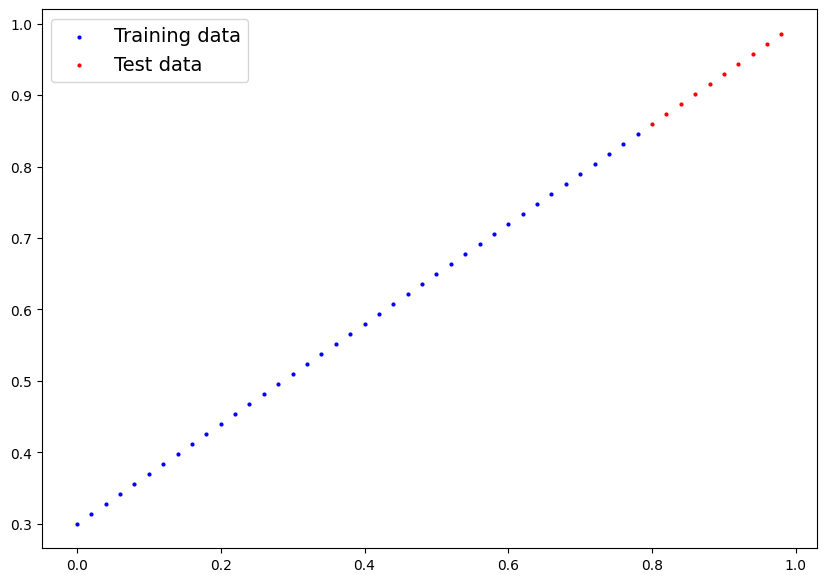

In [64]:
plot_pred()

In [65]:
#Model desoooo
class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        #forward method
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [66]:
torch.manual_seed(42)

lr = LinReg()

list(lr.parameters()) 


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [67]:
lr.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [68]:
with torch.inference_mode():
    y_preds = lr(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

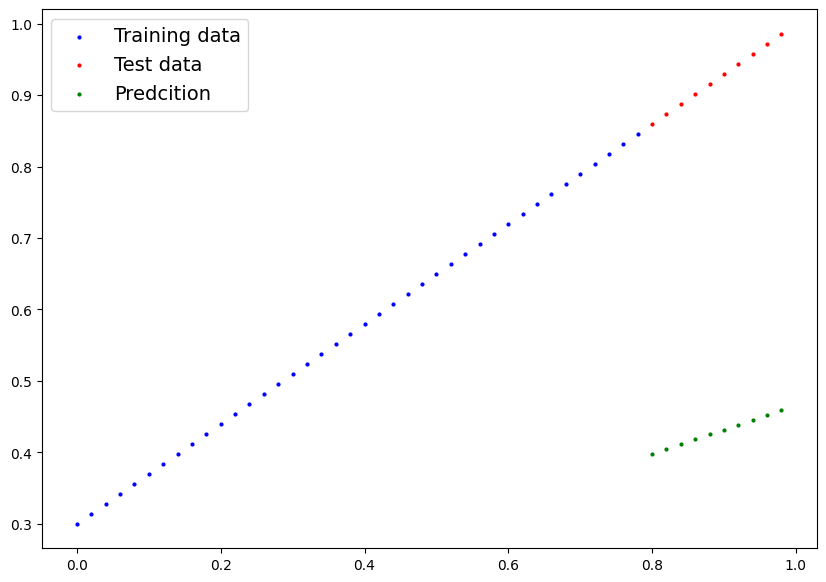

In [69]:
plot_pred(predictions=y_preds)